In [17]:
import pystan
import stan_utility
import matplotlib
import matplotlib.pyplot as plot
# https://github.com/millejoh/emacs-ipython-notebook/issues/41
matplotlib.rcParams["figure.facecolor"] = "white"
matplotlib.rcParams["axes.facecolor"] = "white"
matplotlib.rcParams["savefig.facecolor"] = "white"
import numpy

In [18]:
figsize(10, 6)

In [19]:
light = "#DCBCBC"
light_highlight = "#C79999"
mid = "#B97C7C"
mid_highlight = "#A25050"
dark = "#8F2727"
dark_highlight = "#7C0000"
green = "#00FF00"

In [20]:
data = pystan.read_rdump('discrete_regression.data.R')
data

OrderedDict([('y',
              array([13, 10,  6, 18,  6, 11, 12,  9,  2,  5,  2, 13,  5,  7, 12, 10,  6,
                     15,  3, 12,  3,  3, 12, 10,  4,  5,  4,  5, 13,  7, 15,  9,  9, 13,
                      4, 10,  7,  6, 15,  3,  3,  7, 10, 10,  5,  6,  6, 10,  5,  9,  6,
                      7, 13, 17, 17,  6, 11,  8,  8, 17, 17,  4,  5, 10,  9, 15,  3,  5,
                     14,  8, 11,  8,  9,  8,  8, 10,  8,  1,  8, 12,  7,  5, 13,  8,  5,
                      5,  7,  7,  4,  7,  5,  5,  9,  9,  9, 10,  5, 17, 11, 16,  4, 13,
                     11,  5,  7,  6,  4, 13, 10,  8,  5,  6,  3,  6,  6,  4,  9,  6, 19,
                      3,  7,  6,  3,  9,  6,  2, 13,  4, 11,  7,  4,  7,  5, 12,  7,  6,
                      8,  6,  5,  8,  8,  8, 10,  7, 10,  5,  5, 11,  2,  2, 18,  6,  8,
                     14,  6, 10,  5, 14, 11,  8,  4,  7,  4,  5,  7,  5,  7,  6,  1,  4,
                      3,  3, 11,  6,  5,  1, 10, 10,  2, 15, 10, 14,  5,  6, 10, 13,  3,
  

Using cached StanModel
n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


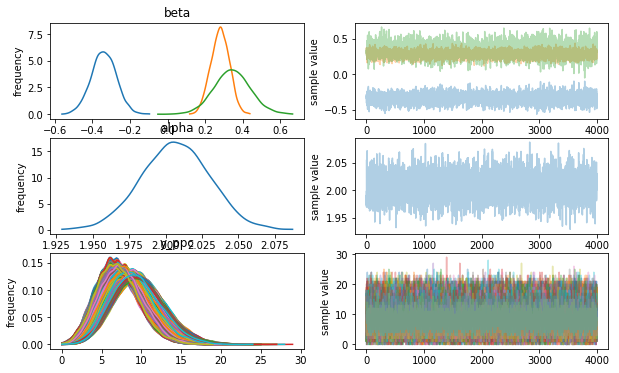

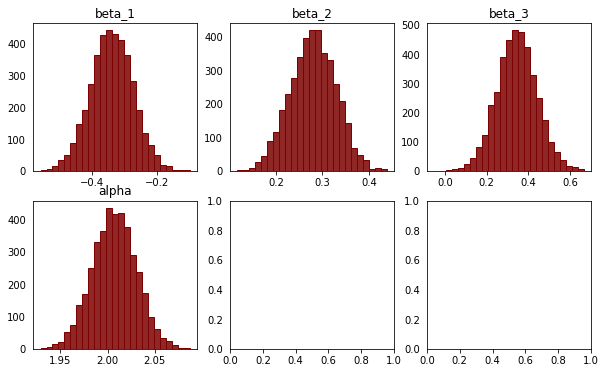

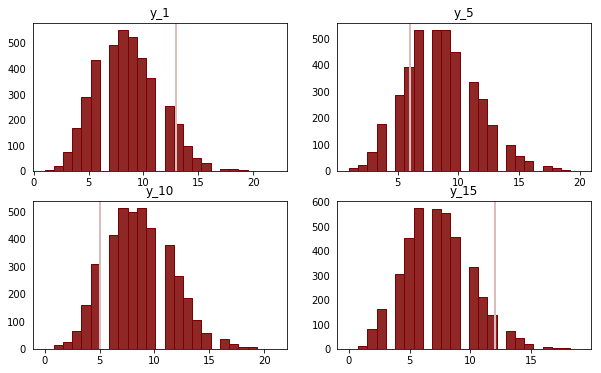

In [23]:
############################################################
# Fit initial Stan program
############################################################

model = stan_utility.compile_model('discrete_regression.stan')
fit = model.sampling(data=data, seed=4938483)

# Or all at once
stan_utility.check_all_diagnostics(fit)

# Default visual summaries
fit.plot()
plot.show()
params = fit.extract()

# Plot marginal posteriors
f, axarr = plot.subplots(2, 3)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("beta_1")
axarr[0, 0].hist(params['beta'][:,0], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 1].set_title("beta_2")
axarr[0, 1].hist(params['beta'][:,1], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 2].set_title("beta_3")
axarr[0, 2].hist(params['beta'][:,2], bins = 25, color = dark, ec = dark_highlight)

axarr[1, 0].set_title("alpha")
axarr[1, 0].hist(params['alpha'], bins = 25, color = dark, ec = dark_highlight)

plot.show()

# Perform a posterior predictive check by plotting
# posterior predictive distributions against data
f, axarr = plot.subplots(2, 2)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("y_1")
axarr[0, 0].hist(params['y_ppc'][:,0], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 0].axvline(x=data['y'][0], linewidth=2, color=light)

axarr[0, 1].set_title("y_5")
axarr[0, 1].hist(params['y_ppc'][:,4], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 1].axvline(x=data['y'][4], linewidth=2, color=light)

axarr[1, 0].set_title("y_10")
axarr[1, 0].hist(params['y_ppc'][:,9], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 0].axvline(x=data['y'][9], linewidth=2, color=light)

axarr[1, 1].set_title("y_15")
axarr[1, 1].hist(params['y_ppc'][:,14], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 1].axvline(x=data['y'][14], linewidth=2, color=light)

plot.show()

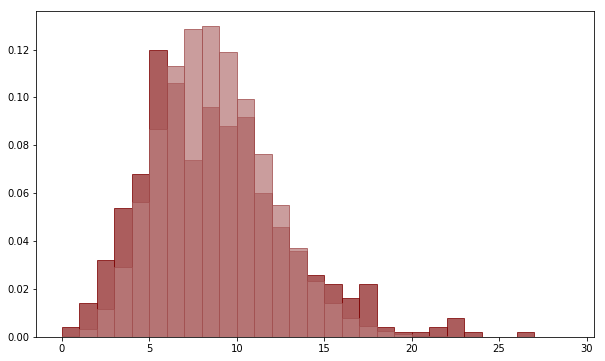

In [22]:
# Perform a posterior predictive check by plotting
# posterior predictive distributions against data
plot.hist(data['y'], bins=range(30), normed=True, alpha=0.75, color=dark, ec=dark_highlight)
plot.hist(params['y_ppc'].flatten(), bins=range(30), normed=True,
          alpha=0.75, color=mid, ec=mid_highlight)
plot.show()
# Data is overdispersed?